In [1]:
import pandas as pd 
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

In [2]:
df=pd.read_csv('Breast Cancer Dataset.csv')

In [3]:
df.shape

(569, 32)

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data preprocessing

In [10]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [12]:
# M--> Malignint
# B--> Benign

In [14]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [18]:
#checking for missing value
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [20]:
import missingno as msno

<Axes: >

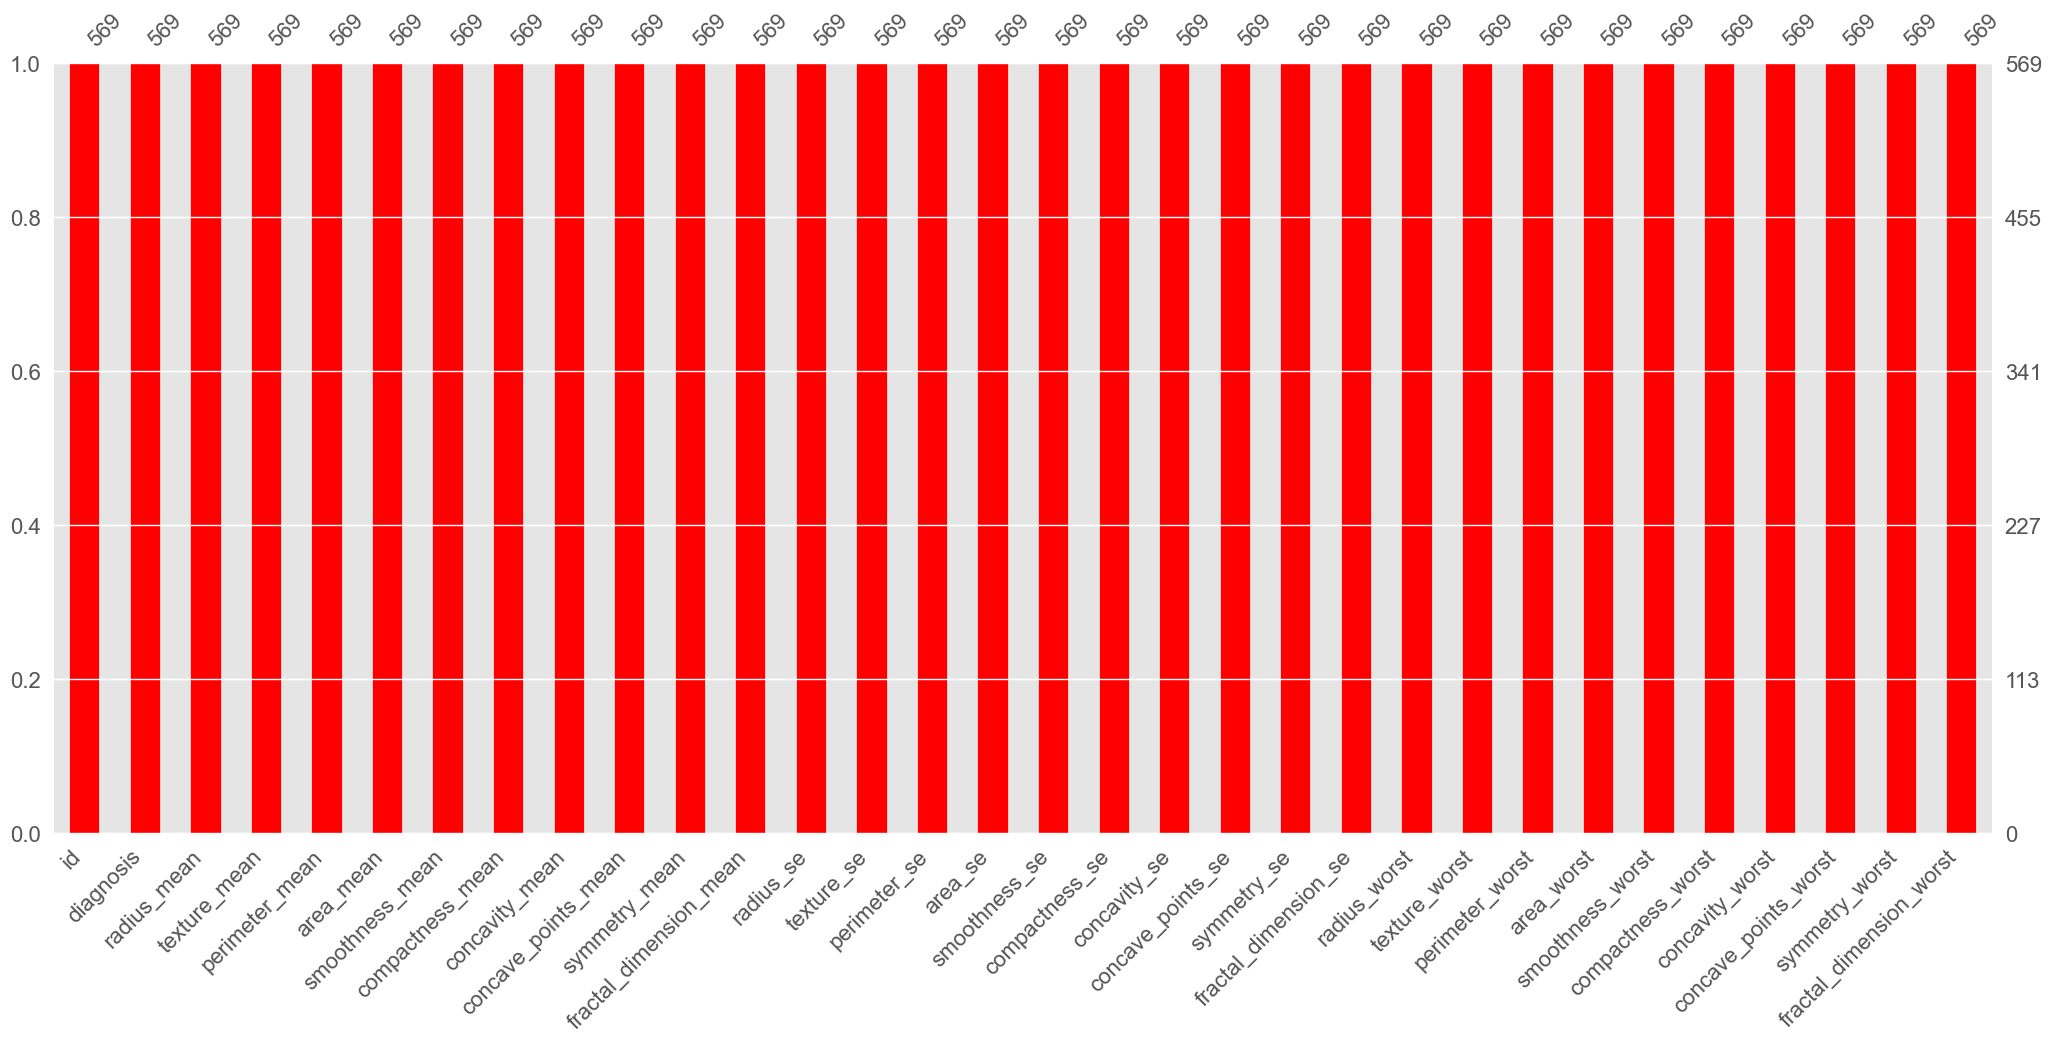

In [22]:
msno.bar(df,color="red")

In [23]:
#There is no missing value in my dataset

In [24]:
df['diagnosis']= df['diagnosis'].map({'B':0, 'M':1})

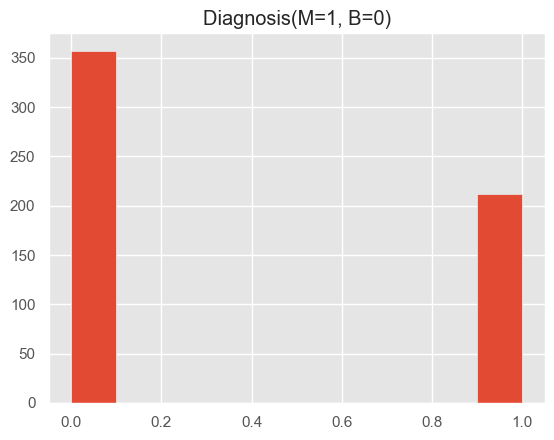

In [25]:
# checking for imbalanced dataset
plt.hist(df['diagnosis'])
plt.title('Diagnosis(M=1, B=0)')
plt.show()

## EDA

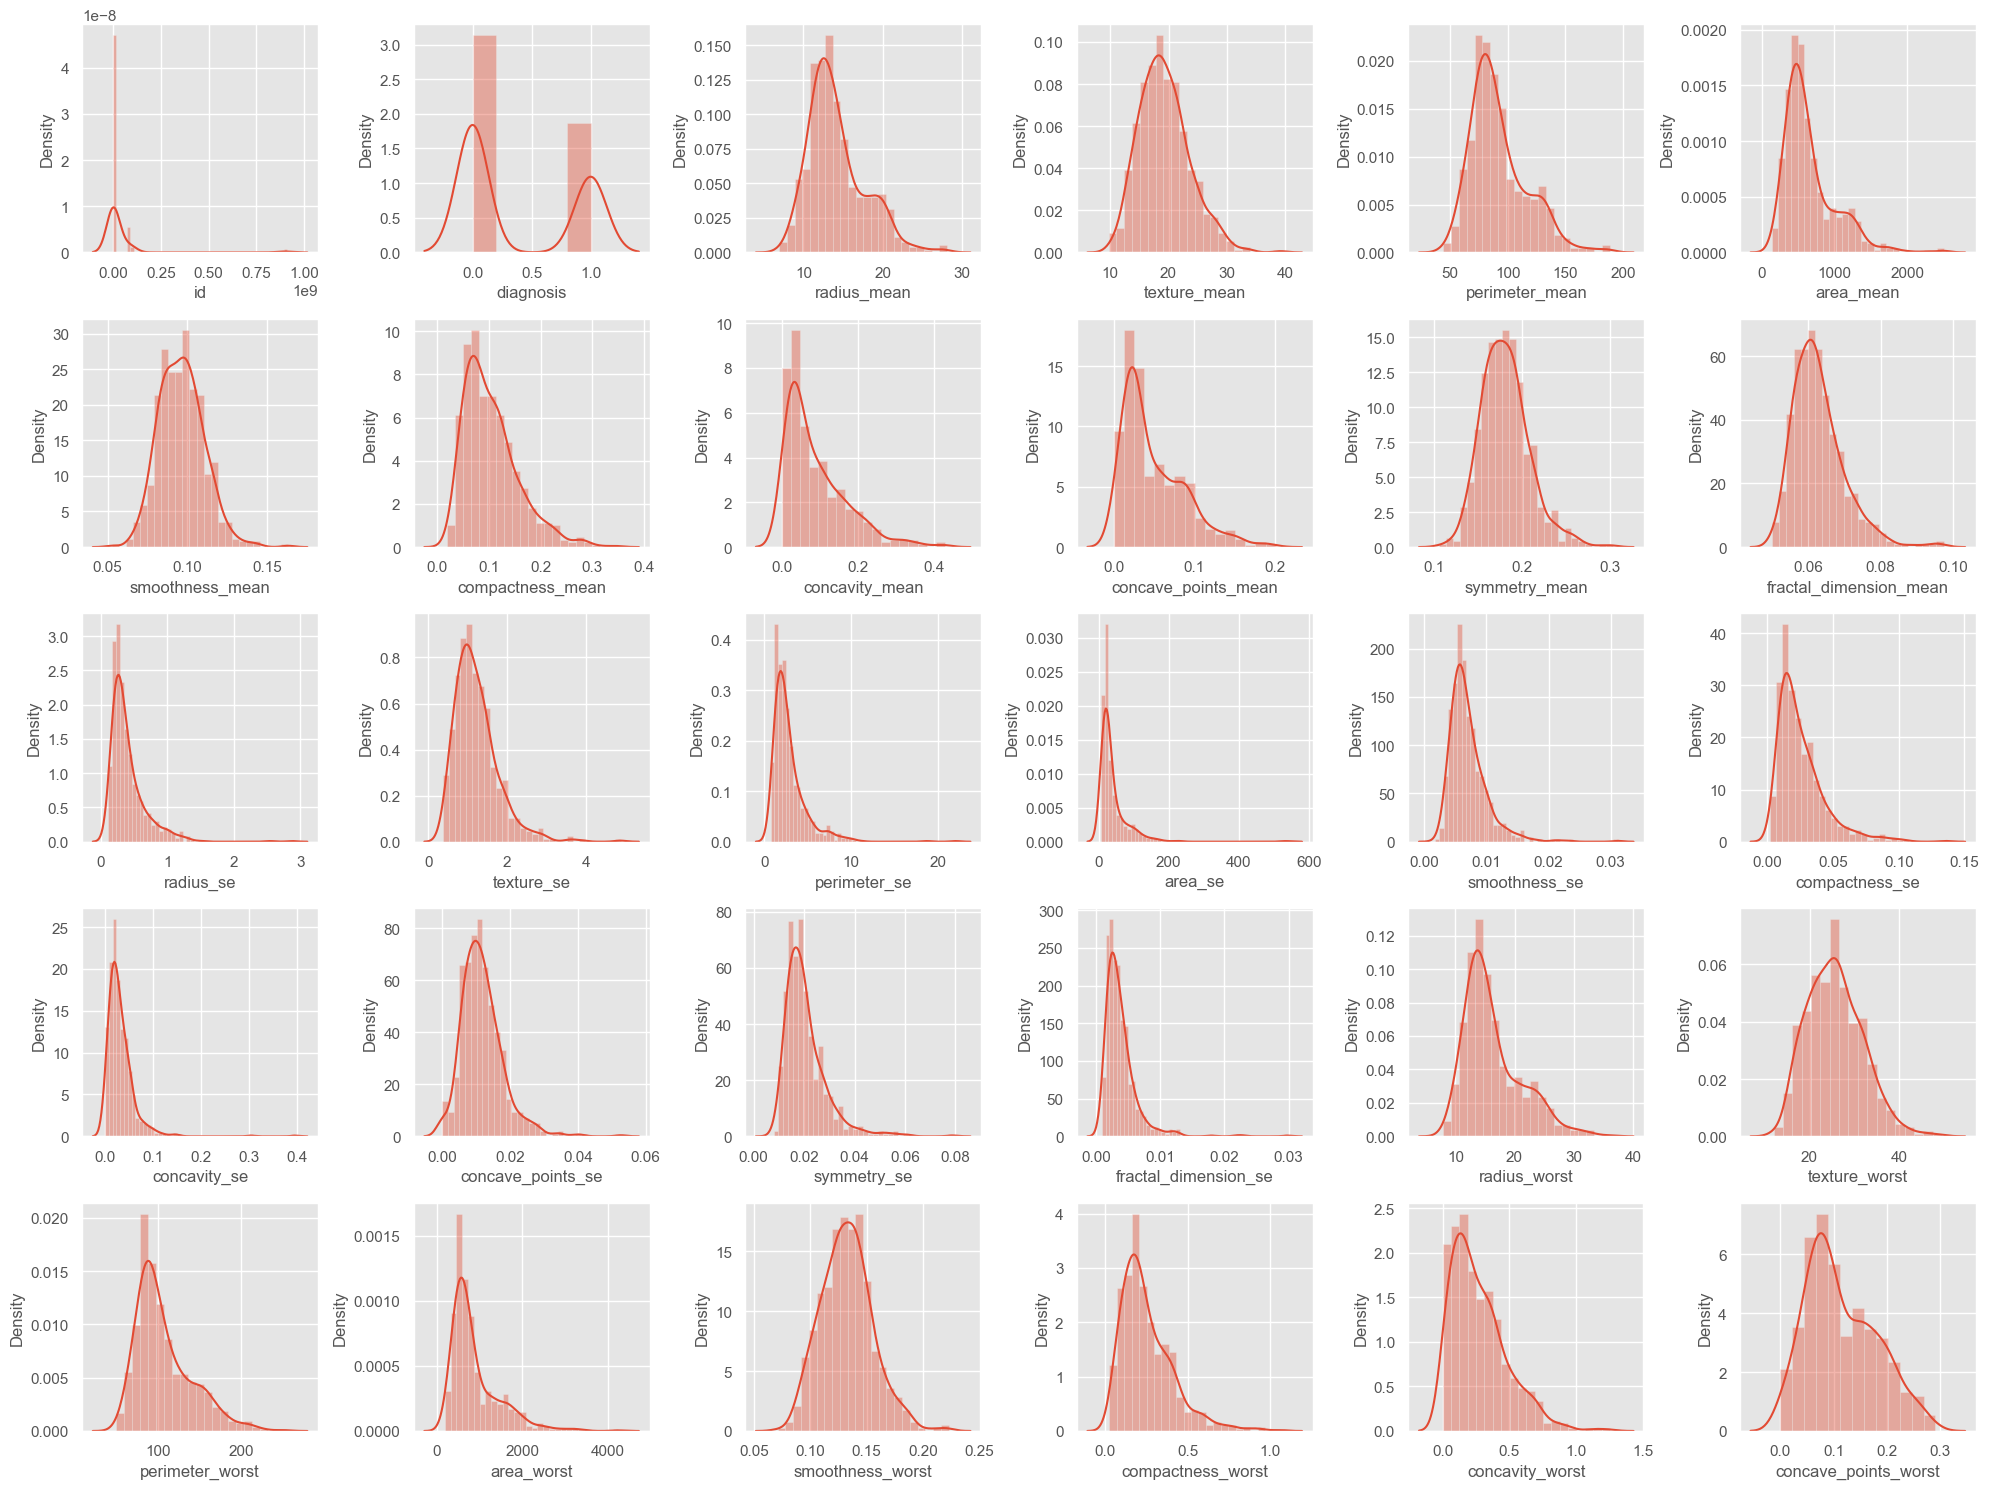

In [27]:
#density graph

plt.figure(figsize=(20,15))

plotnumber=1
for column in df:
    if plotnumber<=30: 
        ax=plt.subplot(5,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        plotnumber+=1 

plt.tight_layout()
plt.show()

## Correlation

In [29]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


<Axes: >

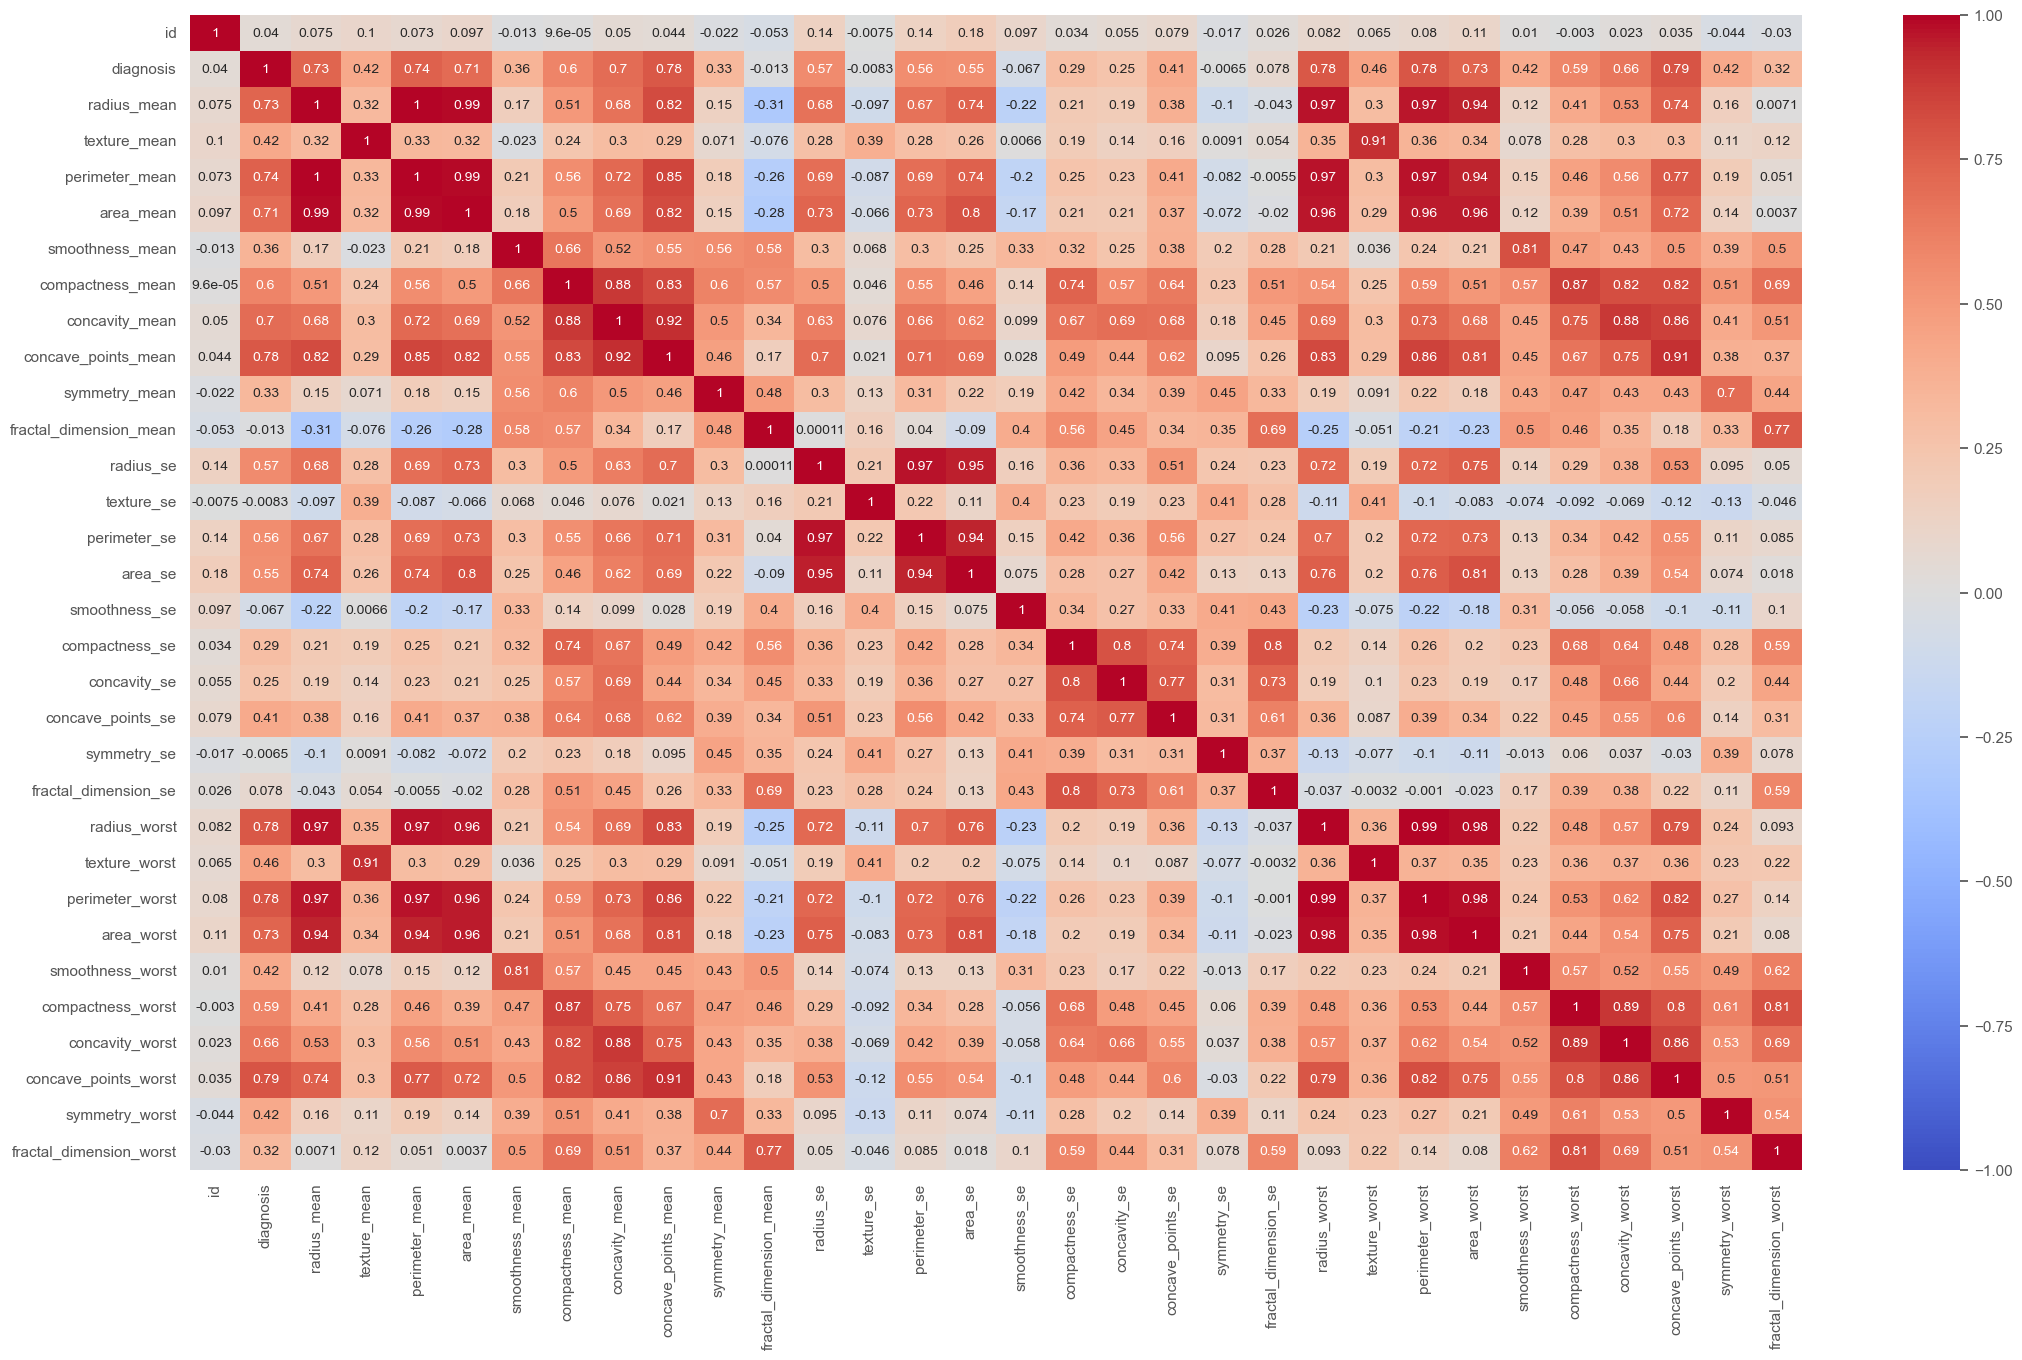

In [30]:
# plot heatmap
plt.figure(figsize=(26,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [31]:
# highly correlated feature
# Multicollinearty

## Feature Selection

In [33]:
df.drop('id',axis=1, inplace=True)

In [34]:
threshold = 0.92

corr_matrix = df.corr().abs()
mask= np.triu(np.ones_like(corr_matrix, dtype= bool))
tri_df=corr_matrix.mask(mask)

to_drop = [ x for x in tri_df.columns if any(tri_df[x]>threshold )] 

df = df.drop(to_drop, axis=1)

print(df.shape[1])

23


In [35]:
df.head(2)

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [36]:
# 32 feature reduce it 23 now

In [37]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [38]:
# Splitting the data

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [44]:
#Scaling Data
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_train_trf=scaler.fit_transform(X_train)
X_test_trf=scaler.transform(X_test)

In [46]:
X_test_trf.shape

(114, 22)

In [47]:
# Apply Mechine learning Algorithm

## Model 1: Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression()

In [51]:
lr.fit(X_train_trf,y_train)

LogisticRegression()

In [52]:
y_pred1 = lr.predict(X_test_trf)

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [54]:
print('Accuracy_score_for_testing_data:',accuracy_score(y_test,y_pred1))
print('='*80)
print('Accuracy_score_for_traing_data:',accuracy_score(y_train,lr.predict(X_train_trf)))
print('='*80)
print('confusion_matrix:')
print(confusion_matrix(y_test,y_pred1))
print('='*80)
print('Classification_Report')
print(classification_report(y_test, y_pred1))

Accuracy_score_for_testing_data: 0.9736842105263158
Accuracy_score_for_traing_data: 0.9868131868131869
confusion_matrix:
[[70  1]
 [ 2 41]]
Classification_Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Model 2: KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [57]:
y_pred2 = knn.predict(X_test_trf)

In [58]:
print('Accuracy_score_for_testing_data:',accuracy_score(y_test,y_pred2))
print('='*80)
print('Accuracy_score_for_traing_data:',accuracy_score(y_train,knn.predict(X_train_trf)))
print('='*80)
print('confusion_matrix:')
print(confusion_matrix(y_test,y_pred2))
print('='*80)
print('Classification_Report')
print(classification_report(y_test, y_pred2))

Accuracy_score_for_testing_data: 0.9385964912280702
Accuracy_score_for_traing_data: 0.9714285714285714
confusion_matrix:
[[68  3]
 [ 4 39]]
Classification_Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



## Model 3: Using Support Vector Regressor

In [60]:
#Hyperparameter tunning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()

param_grid={
    'gamma':[0.0001,0.001,0.01,0.1],
    'C':[0.01,0.05,0.1,1,10,15]
}

grid_search = GridSearchCV(estimator= svc, param_grid=param_grid)
grid_search.fit(X_train_trf,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.1, 1, 10, 15],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [61]:
grid_search.best_params_

{'C': 15, 'gamma': 0.01}

In [62]:
grid_search.best_score_

0.9714285714285715

In [63]:
svc = SVC(C=15, gamma=0.01, probability=True)
svc.fit(X_train_trf,y_train)

SVC(C=15, gamma=0.01, probability=True)

In [64]:
y_pred3=svc.predict(X_test_trf)

In [65]:
print('Accuracy_score_for_testing_data:',accuracy_score(y_test,y_pred3))
print('='*80)
print('Accuracy_score_for_traing_data:',accuracy_score(y_train,svc.predict(X_train_trf)))
print('='*80)
print('confusion_matrix:')
print(confusion_matrix(y_test,y_pred3))
print('='*80)
print('Classification_Report')
print(classification_report(y_test, y_pred3))

Accuracy_score_for_testing_data: 0.9824561403508771
Accuracy_score_for_traing_data: 0.989010989010989
confusion_matrix:
[[71  0]
 [ 2 41]]
Classification_Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Model 4: Decision Tree Classifier

In [69]:
# Hyperparameter tunning

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

param_grid={
    'criterion':['gini','entropy'],
    'max_depth':range(2,10,2),
    'min_samples_leaf':range(2,6,2), 
    'splitter':['best','random']
}

grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=10)
grid_search_dt.fit(X_train_trf,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 2),
                         'min_samples_leaf': range(2, 6, 2),
                         'splitter': ['best', 'random']},
             verbose=10)

In [99]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 4,
 'splitter': 'best'}

In [101]:
grid_search_dt.best_score_

0.9406593406593406

In [103]:
dt=DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2, splitter='random')

In [105]:
dt.fit(X_train_trf,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       splitter='random')

In [107]:
y_pred4 = dt.predict(X_test_trf)

In [109]:
print('Accuracy_score_for_testing_data:',accuracy_score(y_test,y_pred4))
print('='*80)
print('Accuracy_score_for_traing_data:',accuracy_score(y_train,dt.predict(X_train_trf)))
print('='*80)
print('confusion_matrix:')
print(confusion_matrix(y_test,y_pred4))
print('='*80)
print('Classification_Report')
print(classification_report(y_test, y_pred4))

Accuracy_score_for_testing_data: 0.9385964912280702
Accuracy_score_for_traing_data: 0.9714285714285714
confusion_matrix:
[[67  4]
 [ 3 40]]
Classification_Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



## MOdel 5: Random Forest Classifier

In [166]:
# Hyperparameter tunning

from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()

param_grid={
    'n_estimators':[100,300,500],
    'criterion':['gini','entropy'],
    'max_depth':range(2,8,2),
    'min_samples_leaf':range(2,6,2) 
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=10)
grid_search_rf.fit(X_train_trf,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 8, 2),
                         'min_samples_leaf': range(2, 6, 2),
                         'n_estimators': [100, 300, 500]},
             verbose=10)

In [168]:
grid_search_rf.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'n_estimators': 500}

In [170]:
grid_search_rf.best_score_

0.9670329670329669

In [174]:
rf = RandomForestClassifier(n_estimators=500,max_depth=6, min_samples_leaf=2, criterion='gini')

In [176]:
rf.fit(X_train_trf,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=2, n_estimators=500)

In [178]:
y_pred5= rf.predict(X_test_trf)

In [180]:
print('Accuracy_score_for_testing_data:',accuracy_score(y_test,y_pred5))
print('='*80)
print('Accuracy_score_for_traing_data:',accuracy_score(y_train,rf.predict(X_train_trf)))
print('='*80)
print('confusion_matrix:')
print(confusion_matrix(y_test,y_pred5))
print('='*80)
print('Classification_Report')
print(classification_report(y_test, y_pred5))

Accuracy_score_for_testing_data: 0.9649122807017544
Accuracy_score_for_traing_data: 0.9934065934065934
confusion_matrix:
[[70  1]
 [ 3 40]]
Classification_Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Model 6: Using Gradient Boosting

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

gbc= GradientBoostingClassifier()

param_grid={
    'n_estimators':[100,150,180],
    'learning_rate':[0.01,0.1,1.0],
    'loss':['deviance','exponential']
}

grid_search_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=10)
grid_search_gbc.fit(X_train_trf,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180]},
             verbose=10)

In [113]:
grid_search_gbc.best_params_

{'learning_rate': 1.0, 'loss': 'exponential', 'n_estimators': 180}

In [117]:
grid_search_gbc.best_score_

0.969196584175671

In [119]:
gbc=GradientBoostingClassifier(n_estimators=180, learning_rate=1.0, loss='exponential')
gbc.fit(X_train_trf,y_train)

GradientBoostingClassifier(learning_rate=1.0, loss='exponential',
                           n_estimators=180)

In [121]:
y_pred6= gbc.predict(X_test_trf)

In [123]:
print('Accuracy_score_for_testing_data:',accuracy_score(y_test,y_pred6))
print('='*80)
print('Accuracy_score_for_traing_data:',accuracy_score(y_train,gbc.predict(X_train_trf)))
print('='*80)
print('confusion_matrix:')
print(confusion_matrix(y_test,y_pred6))
print('='*80)
print('Classification_Report')
print(classification_report(y_test, y_pred6))

Accuracy_score_for_testing_data: 0.956140350877193
Accuracy_score_for_traing_data: 1.0
confusion_matrix:
[[69  2]
 [ 3 40]]
Classification_Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Model 7: Using Gradient Boosting

In [142]:
from xgboost import XGBClassifier

xgb= XGBClassifier()

param_grid={
    'n_estimators':[100,150,180,200,300],
    'learning_rate':[0.01,0.1,1.0],
    'max_depth':[2,5,8,4]
}

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=10)
grid_search_xgb.fit(X_train_trf,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [2, 5, 8, 4],
                         'n_estimators': [100, 150, 180, 200, 300]},
             verbose=10)

In [144]:
grid_search_xgb.best_params_

{'learning_rate': 1.0, 'max_depth': 5, 'n_estimators': 100}

In [146]:
grid_search_xgb.best_score_

0.9692111072382943

In [152]:
xgb=XGBClassifier(objective='binary:logistic',n_estimators=100,learning_rate=1.0,max_depth=5)

In [156]:
xgb.fit(X_train_trf,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1.0, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [158]:
y_pred7=xgb.predict(X_test_trf)

In [160]:
print('Accuracy_score_for_testing_data:',accuracy_score(y_test,y_pred7))
print('='*80)
print('Accuracy_score_for_traing_data:',accuracy_score(y_train,xgb.predict(X_train_trf)))
print('='*80)
print('confusion_matrix:')
print(confusion_matrix(y_test,y_pred7))
print('='*80)
print('Classification_Report')
print(classification_report(y_test, y_pred7))

Accuracy_score_for_testing_data: 0.956140350877193
Accuracy_score_for_traing_data: 1.0
confusion_matrix:
[[68  3]
 [ 2 41]]
Classification_Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [190]:
models=pd.DataFrame({
    'Model':['Logistic Regression','KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'], 
    'Score':[100*round(accuracy_score(y_test,y_pred1),4), 100*round(accuracy_score(y_test,y_pred2),4), 100*round(accuracy_score(y_test,y_pred3),4),
             100*round(accuracy_score(y_test,y_pred4),4), 100*round(accuracy_score(y_test,y_pred5),4),100*round(accuracy_score(y_test,y_pred6),4),
             100*round(accuracy_score(y_test,y_pred7),4)]
})

models.sort_values(by='Score', ascending= False)

,Model,Score
2,SVM,98.25
0,Logistic Regression,97.37
4,Random Forest Classifier,96.49
5,Gradient Boosting Classifier,95.61
6,XgBoost,95.61
1,KNN,93.86
3,Decision Tree Classifier,93.86


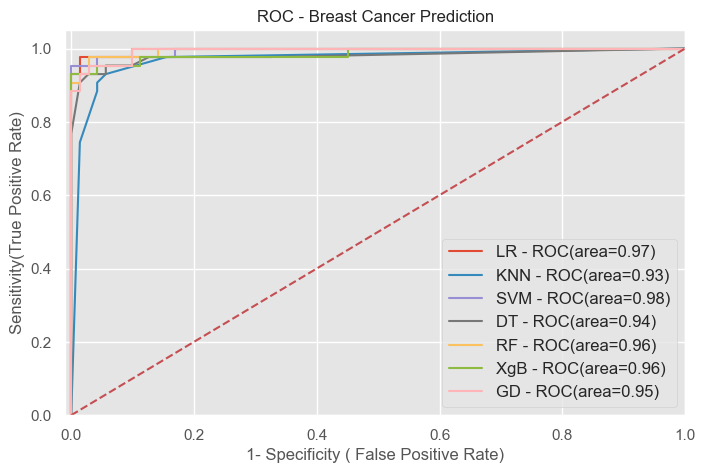

In [200]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models=[
{
    'label': 'LR',
    'model':lr,
    
},
{
    'label': 'KNN',
    'model':knn,
    
},    
{
    'label': 'SVM',
    'model':svc,
    
},
{
    'label': 'DT',
    'model':dt,
    
},
{
    'label': 'RF',
    'model':rf,
    
},
{
    'label': 'XgB',
    'model':xgb,
    
},
{
    'label': 'GD',
    'model':gbc,
    
},    
]

for m in models:
    model = m['model']
    model.fit(X_train_trf,y_train)
    y_pred=model.predict(X_test_trf)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_trf)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test_trf))
    plt.plot(fpr1, tpr1, label='%s - ROC(area=%0.2f)' % (m['label'],auc))

plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.01,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1- Specificity ( False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity(True Positive Rate)', fontsize=12)
plt.title('ROC - Breast Cancer Prediction', fontsize=12)
plt.legend(loc='lower right',fontsize=12)
plt.savefig('roc_breast_cancer.jpeg',format='jpeg',dpi=400, bbox_inches='tight')
plt.show()

[97.37, 93.86, 98.25, 93.86, 96.49, 95.61, 95.61]
[96.97, 93.24, 97.67, 93.94, 95.81, 95.56, 95.1]


<Figure size 800x500 with 0 Axes>

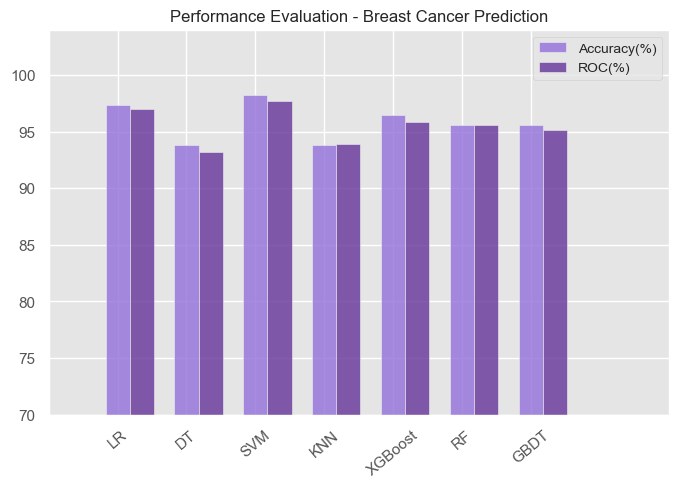

In [198]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models=[
{
    'label': 'LR',
    'model':lr,
    
},
{
    'label': 'KNN',
    'model':knn,
    
},    
{
    'label': 'SVM',
    'model':svc,
    
},
{
    'label': 'DT',
    'model':dt,
    
},
{
    'label': 'RF',
    'model':rf,
    
},
{
    'label': 'XgB',
    'model':xgb,
    
},
{
    'label': 'GD',
    'model':gbc,
    
},    
]

means_roc = []

means_accuracy = [100*round(accuracy_score(y_test,y_pred1),4), 100*round(accuracy_score(y_test,y_pred2),4),
                  100*round(accuracy_score(y_test,y_pred3),4), 100*round(accuracy_score(y_test,y_pred4),4),
                  100*round(accuracy_score(y_test,y_pred5),4),100*round(accuracy_score(y_test,y_pred6),4),
                  100*round(accuracy_score(y_test,y_pred7),4)]
for m in models:
    
    model = m['model']
    model.fit(X_train_trf,y_train)
    y_pred=model.predict(X_test_trf)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_trf)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test_trf))
    auc= 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

#data to plot

n_groups=7
means_accuracy=tuple(means_accuracy)
means_roc=tuple(means_roc)

# create plot

fig,ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width=0.35
opacity=0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color= 'mediumpurple',
label='Accuracy(%)' ) 

rects2=plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC(%)')

plt.xlim([-1,8])
plt.ylim([70,104])

plt.title('Performance Evaluation - Breast Cancer Prediction', fontsize=12)
plt.xticks(index, ('LR', 'DT', 'SVM','KNN','XGBoost','RF','GBDT'),rotation=40)
plt.legend(loc='upper right',fontsize=10) 
plt.savefig('PE_breast_cancer.jpeg',format='jpeg',dpi=400, bbox_inches='tight')
plt.show()